In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../dataset/')
from dataset import AsbestosDataSet
import os 
from pathlib import Path
from PIL import Image
import albumentations as A

In [2]:
image_dir = '/home/kirill/Учеба/asbestos/task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/JPEGImages/asbestos/stones/161220'
mask_dir  = '/home/kirill/Учеба/asbestos/task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/SegmentationAsbest'
dataset = AsbestosDataSet(image_dir, mask_dir)

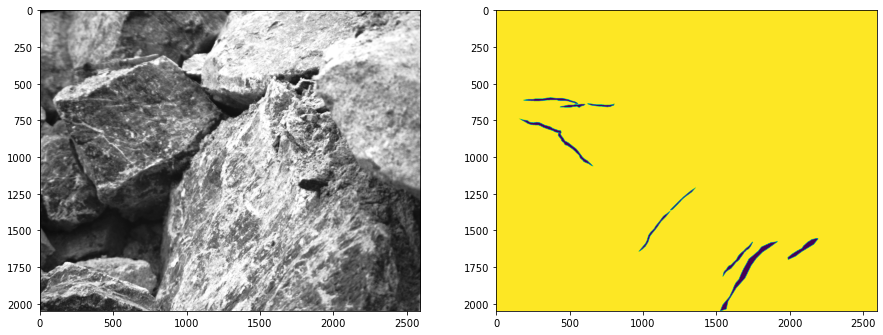

In [3]:
example = dataset[21]
image = example['image']
mask  = example['mask']

fig, ax = plt.subplots(1,2, figsize=(15,15), )
ax[0].imshow(image,cmap = 'Greys_r')
ax[1].imshow(mask)

In [13]:
t_h = 256
transform = A.Compose([A.RandomCrop(width=512*3, height=512*3), A.Resize(t_h,t_h), A.RandomRotate90()])

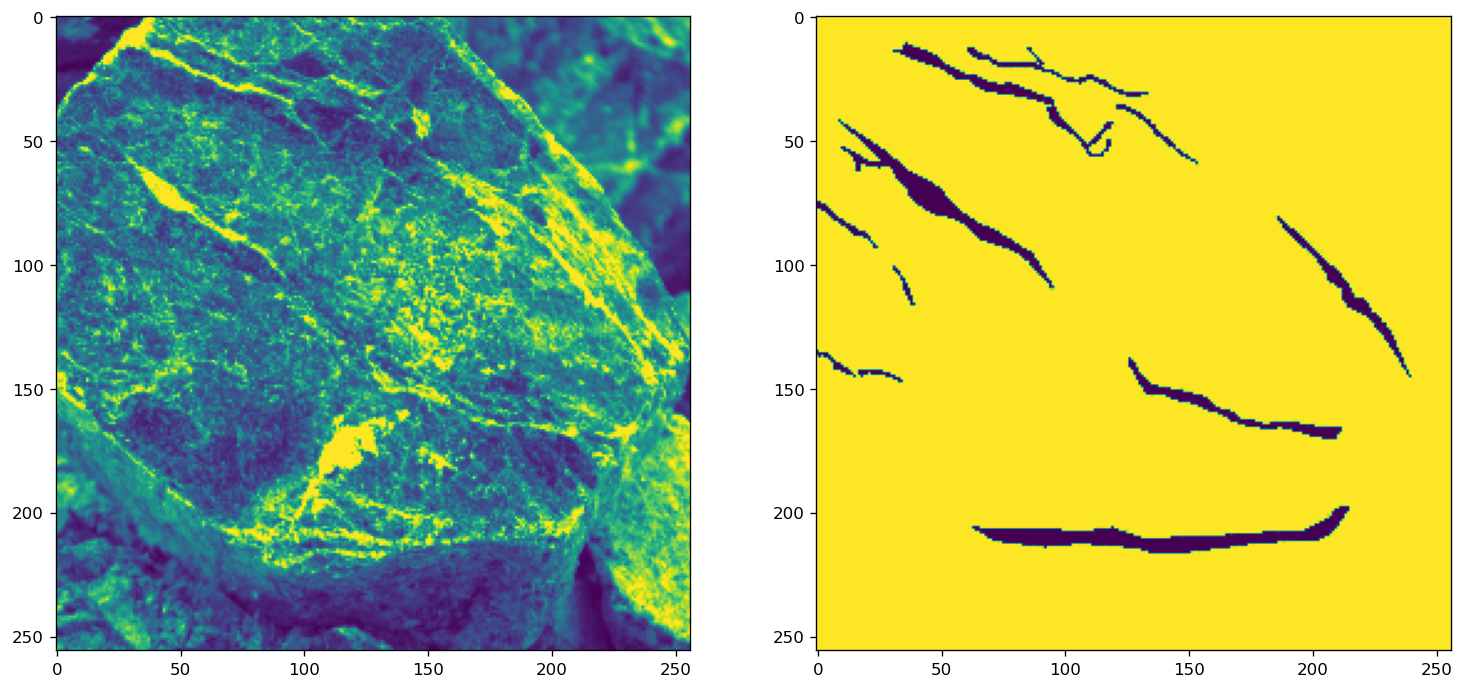

In [14]:
for i in range(23):
    example = dataset[i]
    image = example['image']
    mask  = example['mask']
    transformed = transform(image=np.array(image), mask=np.array(mask))
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
fig, ax = plt.subplots(1,2, figsize=(15,15), dpi = 120 )
ax[0].imshow(transformed_image)
ax[1].imshow(transformed_mask)

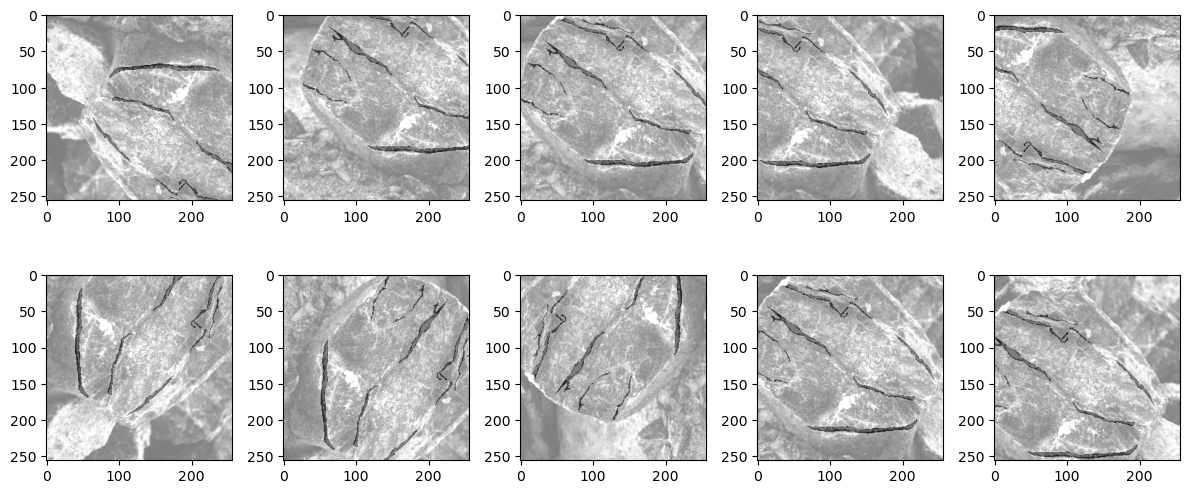

In [15]:
image = example['image']
mask  = example['mask']
fig, axis = plt.subplots(2,5, dpi = 100, figsize=(12,6))

j = 0
for i in range(10):
    transformed = transform(image=np.array(image), mask=np.array(mask))
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    if i < 5:
        axis[0,i].imshow(transformed_image,cmap='gray',)
        axis[0,i].imshow(transformed_mask, alpha = 0.5, cmap='gray',)
    else:
        axis[1,i-5].imshow(transformed_image,cmap='gray',)
        axis[1,i-5].imshow(transformed_mask, alpha = 0.5, cmap='gray',)
    j+=1
    fig.tight_layout()

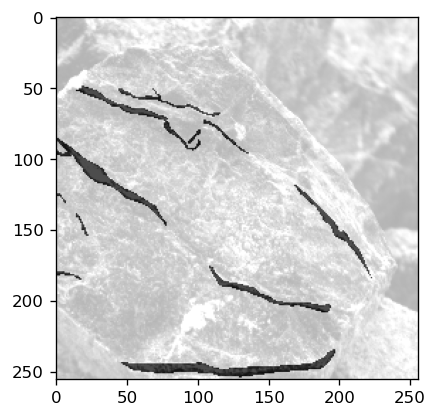

In [17]:
fig = plt.figure(dpi = 120)

plt.imshow(transformed_image, cmap='gray')
plt.imshow(transformed_mask, alpha = 0.7, cmap='gray',)

In [18]:
trans_set = AsbestosDataSet(image_dir, mask_dir, transform)

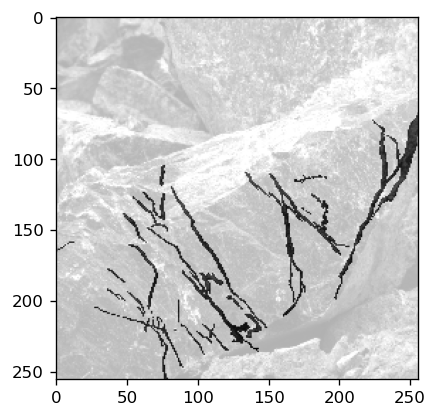

In [19]:
t = trans_set[56]
fig = plt.figure(dpi = 120)
plt.imshow(t['image'], cmap='gray')
plt.imshow(t['mask'], alpha = 0.7, cmap='gray',)

In [20]:
test = Image.open('/home/kirill/Учеба/asbestos/task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/JPEGImages/asbestos/stones/161220/Full_637437071697103795.bmp')

In [21]:
test = np.array(test) 
test/test.max()

array([[0.34509804, 0.34117647, 0.33333333, ..., 0.39215686, 0.38431373,
        0.38039216],
       [0.34901961, 0.33333333, 0.3372549 , ..., 0.40392157, 0.41176471,
        0.4       ],
       [0.34901961, 0.34117647, 0.3254902 , ..., 0.40784314, 0.40784314,
        0.42745098],
       ...,
       [0.14901961, 0.14901961, 0.12941176, ..., 0.30196078, 0.28235294,
        0.25490196],
       [0.15294118, 0.14117647, 0.14901961, ..., 0.28627451, 0.27843137,
        0.25098039],
       [0.12941176, 0.1372549 , 0.14117647, ..., 0.29803922, 0.28235294,
        0.25882353]])